# 📘 Linear Regression using OLS (Ordinary Least Squares)

### 🔹 What is Linear Regression?

Linear Regression is a **supervised learning algorithm** used to model the relationship between a **dependent variable (Y)** and one or more **independent variables (X)**.

It assumes a **linear relationship**:


Y = β_0 + β_1X_1 + β_2X_2 + ... + β_nX_n + ε

Where:
- β_0 : Intercept  
- β_1, β_2, ... β_n : Coefficients (weights)
- ε  Error term

---

### 🔹 What is OLS (Ordinary Least Squares)?

**OLS** is a method to estimate these coefficients by **minimizing the sum of squared errors** between actual and predicted values:


\text{Minimize } \sum_{i=1}^{n}(Y_i - \hat{Y_i})^2


OLS finds the “best fit” line that minimizes this error.

---

### 🧠 **Goal:**
To fit a straight line that best explains the relationship between variables and use it for prediction.


In [ ]:
!pip install statsmodels

In [3]:
# 📈 Linear Regression using OLS

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Generate synthetic dataset
np.random.seed(42)
X = np.random.rand(100, 1) * 10
y = 2.5 * X.squeeze() + np.random.randn(100) * 2 + 5  # y = 2.5x + 5 + noise

# Convert to DataFrame for clarity
df = pd.DataFrame({'X': X.squeeze(), 'Y': y})

# Add constant term for intercept
X_const = sm.add_constant(X)

# Fit OLS model
model = sm.OLS(y, X_const).fit()

# Display model summary
print(model.summary())


                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.940
Model:                            OLS   Adj. R-squared:                  0.940
Method:                 Least Squares   F-statistic:                     1543.
Date:                Thu, 06 Nov 2025   Prob (F-statistic):           8.82e-62
Time:                        23:44:39   Log-Likelihood:                -200.46
No. Observations:                 100   AIC:                             404.9
Df Residuals:                      98   BIC:                             410.1
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          5.4302      0.341     15.944      0.0

In [4]:
# 🎯 Evaluate OLS Model

y_pred = model.predict(X_const)

mae = mean_absolute_error(y, y_pred)
mse = mean_squared_error(y, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y, y_pred)

print("Performance Metrics:")
print(f"Mean Absolute Error (MAE): {mae:.3f}")
print(f"Mean Squared Error (MSE): {mse:.3f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.3f}")
print(f"R² Score: {r2:.3f}")


Performance Metrics:
Mean Absolute Error (MAE): 1.402
Mean Squared Error (MSE): 3.226
Root Mean Squared Error (RMSE): 1.796
R² Score: 0.940


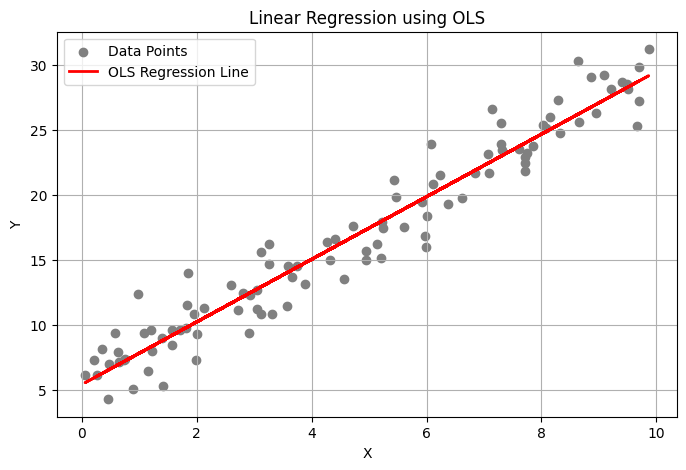

In [5]:
# 📊 Visualize regression line

plt.figure(figsize=(8,5))
plt.scatter(X, y, label="Data Points", color='gray')
plt.plot(X, model.predict(X_const), color='red', linewidth=2, label="OLS Regression Line")
plt.title("Linear Regression using OLS")
plt.xlabel("X")
plt.ylabel("Y")
plt.legend()
plt.grid(True)
plt.show()


### 🧾 **Interpretation of OLS Output**

- **coef (β):** The slope — how much Y changes when X increases by 1.
- **const (β₀):** The intercept — predicted value when X = 0.
- **R²:** Indicates how well the model fits the data (closer to 1 = better fit).
- **p-values:** Tests if coefficients are statistically significant.

---

### ✅ **Key Takeaways**

- OLS minimizes squared differences → gives the best linear fit.
- Works well for linear relationships.
- Sensitive to **outliers** and **multicollinearity**.
- Always visualize your data and check assumptions before trusting results.
